# Data cleaning
In this notebook we clean the race data:
* delete the duplicate
* delete the zero in the total time also DNS, DNF, etc
* delete the outliner in the race
* insert the position for the different race and the position for swim bike and run
* divide from male to female and save two different file
* divide for sprint and standard distance and save in two different file (4 file female sprint and olimpic, male sprint and olimpic)

In the `header_indication.txt` there are indication about the columns in the `race_result.csv`

In [66]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt

Open file with data and drop the duplicate.\
Know the number of the line

In [100]:
data_dyrt = pd.read_csv("race_result.csv", low_memory=False)
df = pd.DataFrame(data_dyrt)
len(df)

301986

In [101]:
df.shape

(301986, 78)

Drop the duplicated line using generate_ID\
Find the number of the line 

In [102]:
df_dropped = df.drop_duplicates(subset=["generated_id"])
df.shape

(301986, 78)

Delete all DNF, DNS, DSQ, etc

In [104]:
df['total_time'].value_counts()

DNF         19824
LAP          1864
DSQ          1831
DNS          1679
00:00:00      372
            ...  
03:45:32        1
03:38:17        1
03:32:52        1
03:41:48        1
03:39:16        1
Name: total_time, Length: 12894, dtype: int64

In [111]:
dnf = df.drop(df.loc[df['total_time'] == "DNF"].index, inplace=True)
lap = df.drop(df.loc[df['total_time'] == "LAP"].index, inplace=True)
dsq = df.drop(df.loc[df['total_time'] == "DSQ"].index, inplace=True)
dns = df.drop(df.loc[df['total_time'] == "DNS"].index, inplace=True)
df['total_time'].value_counts()

00:00:00       372
00:59:20       121
00:59:54       115
01:02:05       115
01:00:55       113
              ... 
549,08 pts       1
641,72 pts       1
751 pts          1
2193,75 pts      1
04:39:32         1
Name: total_time, Length: 12890, dtype: int64

Select the data to find the position for every legth\
sort dataframe from prog_id and swim_time_sec\
assign position to each legth in prog_id based on the legth position

In [112]:
df['swim_position'] = df.groupby('prog_id')['tempo_nuoto_sec'].rank(method="first")
df['t1_position'] = df.groupby('prog_id')['tempo_T1_sec'].rank(method="first")
df['bike_position'] = df.groupby('prog_id')['tempo_ciclismo_sec'].rank(method="first")
df['t2_position'] = df.groupby('prog_id')['tempo_T2_sec'].rank(method="first")
df['run_position'] = df.groupby('prog_id')['tempo_corsa_sec'].rank(method="first")
df['final_position'] = df.groupby('prog_id')['tempo_totale_sec'].rank(method="first")          
df['swim_t1_position'] = df.groupby('prog_id')['swim_T1'].rank(method="first")
df['swim_t1_bike_position'] = df.groupby('prog_id')['swim_T1_bike'].rank(method="first")
df['swim_t1_bike_t2_position'] = df.groupby('prog_id')['swim_T1_bike_T2'].rank(method="first")
df['swim_t1_bike_t2_position'] = df.groupby('prog_id')['bike_T2'].rank(method="first")

In [113]:
df.shape

(276788, 87)

In [73]:
df.head()

,generated_id,athlete_id,prog_id,event_id,athlete_first,athlete_last,athlete_gender,dob,athlete_country_id,athlete_yob,...,avg_run_vel_m/s,swim_position,t1_position,bike_position,t2_position,run_position,final_position,swim_t1_position,swim_t1_bike_position,swim_t1_bike_t2_position
0,553017894521,5530,1789,4521,Emma,Snowsill,female,1981-06-15,111,1981.0,...,4.69,3.0,1.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0
1,551717894521,5517,1789,4521,Annabel,Luxford,female,1982-03-02,111,1982.0,...,4.57,4.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0
2,548417894521,5484,1789,4521,Joanna,Zeiger,female,1970-05-04,293,1970.0,...,4.49,2.0,3.0,5.0,3.0,5.0,3.0,2.0,5.0,5.0
3,539917894521,5399,1789,4521,Laura,Bennett,female,1975-04-25,293,1975.0,...,4.37,5.0,4.0,1.0,4.0,8.0,4.0,5.0,2.0,1.0
4,536617894521,5366,1789,4521,Barbara,Lindquist,female,1969-07-01,293,1969.0,...,4.26,1.0,5.0,4.0,5.0,11.0,5.0,1.0,4.0,4.0


Find the distnce of the program of the race\
drop all different distance but not the standard and sprint distance program

In [114]:
df["cat_name_specification_second"].unique()

array(['Standard', 'Sprint', 'Paratriathlon', 'Super Sprint', 'anonimus',
       'Mixed Relay'], dtype=object)

In [115]:
df["cat_name_specification_second"].value_counts()

Sprint           153532
Standard         106393
Super Sprint      10451
Paratriathlon      6227
anonimus            119
Mixed Relay          66
Name: cat_name_specification_second, dtype: int64

In [116]:
race_program = ['Standard', 'Sprint']

In [117]:
race_distance = df.loc[df['cat_name_specification_second'].isin(race_program)]
race_distance.value_counts('cat_name_specification_second')


cat_name_specification_second
Sprint      153532
Standard    106393
dtype: int64

drop data in the total_time_sec with 0

In [118]:

total_time_drop = df.drop(df.loc[df['tempo_totale_sec'] == 0].index, inplace=True)
total_time_drop

Find the outliner of the race with a chart

<function matplotlib.pyplot.show(close=None, block=None)>

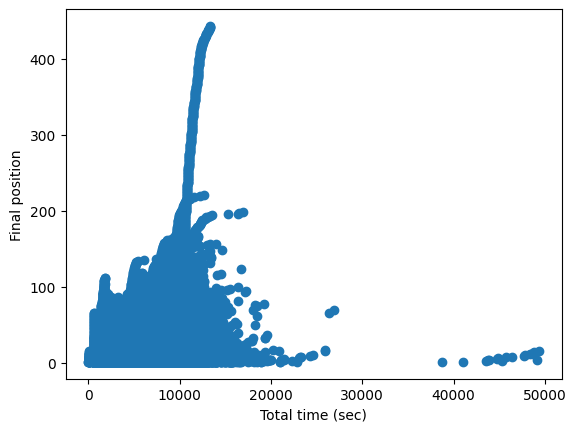

In [119]:
plt.scatter(df["tempo_totale_sec"], df["final_position"])
plt.xlabel("Total time (sec)")
plt.ylabel("Final position")
plt.show

Delete the outliner with the time over 10.800 seconds (ie. 3 hours)

In [120]:
total_time_outliner = df.drop(df.loc[df['tempo_totale_sec'] >= 10800].index, inplace=True)
total_time_outliner


Delete the outliner with time below 1800 seconds (30 minutes)

In [121]:
total_time_lowliner = df.drop(df.loc[df['tempo_totale_sec'] <= 1800].index, inplace=True)
total_time_lowliner

And visualize the result after delete the outliner and lowliner\
In this case there are all categories (from elite to age group) and some race have hundreds of participants)\


<function matplotlib.pyplot.show(close=None, block=None)>

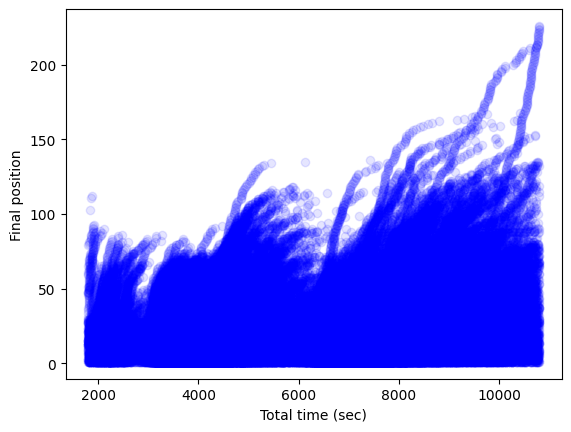

In [122]:
plt.scatter(df["tempo_totale_sec"], df["final_position"], c="blue", alpha=0.1)
plt.xlabel("Total time (sec)")
plt.ylabel("Final position")
plt.show

visualize the data  using gender difference

<function matplotlib.pyplot.show(close=None, block=None)>

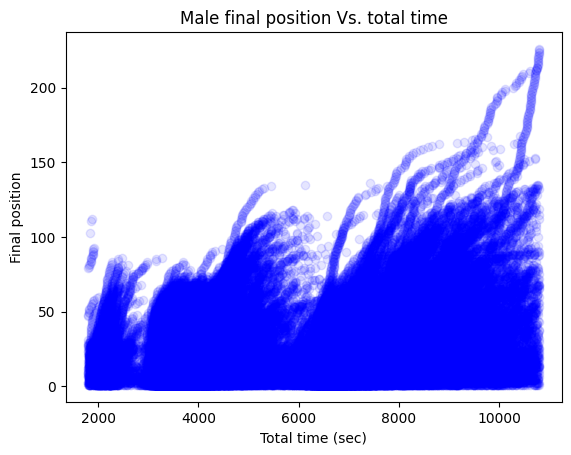

In [123]:
df_male = df[df['athlete_gender'] == 'male']
plt.scatter(df_male["tempo_totale_sec"], df_male["final_position"], c="blue", alpha=0.1)
plt.title("Male final position Vs. total time")
plt.xlabel("Total time (sec)")
plt.ylabel("Final position")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

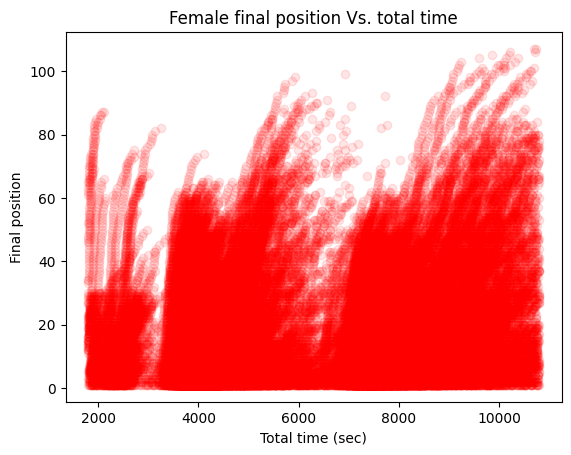

In [85]:
df_female = df[df['athlete_gender'] == 'female']
plt.scatter(df_female["tempo_totale_sec"], df_female["final_position"], c="red", alpha=0.1)
plt.title("Female final position Vs. total time")
plt.xlabel("Total time (sec)")
plt.ylabel("Final position")
plt.show


Find the age of the athlete at the date of the race\
Split the date of event find only the year

In [124]:
df['athlete_yob'] = df['athlete_yob'].fillna(2000).astype(int)  # Sostituisci NaN con 0 (o un altro valore)
# df["year_of_event"] = df["prog_date"].fillna(2000).astype(int)


Convert the year of the event and the year of the birth as integer\
Subsitute the NaN data with a 2000 (year)\
create a new column with the age at the race


In [125]:
df["prog_date_year"] = df["prog_date"].str.split('-').str[0].astype('Int64')
df["prog_date_year"] = df["prog_date_year"].fillna(2000).astype(int)
# Converti le colonne in interi

#df["date_of_event"] = df["date_of_event"].astype(int)  # Converti l'anno dell'evento in intero
df["athlete_yob"] = df["athlete_yob"].astype(int)  # Converti l'anno di nascita in intero

# Calcola l'età al momento della gara
df["age_at_race"] = df["prog_date_year"] - df["athlete_yob"]

df.head()

,generated_id,athlete_id,prog_id,event_id,athlete_first,athlete_last,athlete_gender,dob,athlete_country_id,athlete_yob,...,t1_position,bike_position,t2_position,run_position,final_position,swim_t1_position,swim_t1_bike_position,swim_t1_bike_t2_position,prog_date_year,age_at_race
0,553017894521,5530,1789,4521,Emma,Snowsill,female,1981-06-15,111,1981,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,2005,24
1,551717894521,5517,1789,4521,Annabel,Luxford,female,1982-03-02,111,1982,...,2.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0,2005,23
2,548417894521,5484,1789,4521,Joanna,Zeiger,female,1970-05-04,293,1970,...,3.0,5.0,3.0,5.0,3.0,2.0,5.0,5.0,2005,35
3,539917894521,5399,1789,4521,Laura,Bennett,female,1975-04-25,293,1975,...,4.0,1.0,4.0,8.0,4.0,5.0,2.0,1.0,2005,30
4,536617894521,5366,1789,4521,Barbara,Lindquist,female,1969-07-01,293,1969,...,5.0,4.0,5.0,11.0,5.0,1.0,4.0,4.0,2005,36


Drop the columns that assume we don't use for data analysis

In [126]:
# find the name of the column and compare with the description
column_names = list(df.columns.values)
column_names

['generated_id',
 'athlete_id',
 'prog_id',
 'event_id',
 'athlete_first',
 'athlete_last',
 'athlete_gender',
 'dob',
 'athlete_country_id',
 'athlete_yob',
 'athlete_noc',
 'athlete_age',
 'athlete_categories',
 'prog_name',
 'prog_date',
 'prog_gender',
 'prog_distance_category',
 'prog_distances',
 'prog_notes',
 'cat_name_categories',
 'cat_id_categories',
 'cat_parent_id_categories',
 'cat_name_specification_first',
 'cat_id_specification_first',
 'cat_parent_id_specification_first',
 'cat_name_specification_second',
 'cat_id_specification_second',
 'cat_parent_id_specification_second',
 'event_title',
 'event_venue',
 'event_country',
 'event_latitude',
 'event_longitude',
 'event_date',
 'event_country_noc',
 'event_region_id',
 'event_country_id',
 'event_region_name',
 'temperature_water',
 'temperature_air',
 'humidity',
 'wbgt',
 'wind',
 'weather',
 'wetsuit',
 'position',
 'start_num',
 'split_nuoto',
 'split_T1',
 'split_ciclismo',
 'split_T2',
 'split_corsa',
 'total_ti

In [127]:
# select the column to drop
column_name = ['generated_id', 'athlete_first', 'athlete_last', 'dob', 'athlete_age', 'prog_notes', 'event_title', 'event_venue',
               'athlete_categories', 'prog_gender', 'prog_distance_category', 'prog_distances', 'split_nuoto', 'split_T1',
                'split_ciclismo', 'split_T2', 'split_corsa', 'total_time','event_country', 'event_latitude', 'event_longitude', 
                'temperature_water', 'temperature_air', 'humidity', 'wbgt', 'wind', 'weather', 'wetsuit',]

In [128]:
# drop column
df.drop((column_name), axis=1, inplace=True)
df.head()

,athlete_id,prog_id,event_id,athlete_gender,athlete_country_id,athlete_yob,athlete_noc,prog_name,prog_date,cat_name_categories,...,t1_position,bike_position,t2_position,run_position,final_position,swim_t1_position,swim_t1_bike_position,swim_t1_bike_t2_position,prog_date_year,age_at_race
0,5530,1789,4521,female,111,1981,AUS,Elite Women,2005-07-23,World Cup,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,2005,24
1,5517,1789,4521,female,111,1982,AUS,Elite Women,2005-07-23,World Cup,...,2.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0,2005,23
2,5484,1789,4521,female,293,1970,USA,Elite Women,2005-07-23,World Cup,...,3.0,5.0,3.0,5.0,3.0,2.0,5.0,5.0,2005,35
3,5399,1789,4521,female,293,1975,USA,Elite Women,2005-07-23,World Cup,...,4.0,1.0,4.0,8.0,4.0,5.0,2.0,1.0,2005,30
4,5366,1789,4521,female,293,1969,USA,Elite Women,2005-07-23,World Cup,...,5.0,4.0,5.0,11.0,5.0,1.0,4.0,4.0,2005,36


In [129]:
df["athlete_gender"].value_counts()

male      163491
female     97749
Name: athlete_gender, dtype: int64

In [130]:
df["cat_name_specification_second"].value_counts()

Sprint           146967
Standard         102467
Paratriathlon      6058
Super Sprint       5602
anonimus             81
Mixed Relay          65
Name: cat_name_specification_second, dtype: int64

Create the dataframe with sprint and standard distance\
Save it in a csv file

In [131]:
race_sprint_distance = df[df["cat_name_specification_second"] == "Sprint"]
race_sprint_distance.value_counts("cat_name_specification_second")


cat_name_specification_second
Sprint    146967
dtype: int64

In [132]:
race_standard_distance = df[df["cat_name_specification_second"] == "Standard"]
race_standard_distance.value_counts("cat_name_specification_second")

cat_name_specification_second
Standard    102467
dtype: int64

In [133]:
race_standard_distance.to_csv("race_standard.csv", index=False)
race_sprint_distance.to_csv("race_sprint.csv", index=False)

Open the saved file (standard) and divide for male and female

In [134]:
# open standard csv file
data_standard = pd.read_csv("race_standard.csv", low_memory=False)
standard = pd.DataFrame(data_standard)
standard

,athlete_id,prog_id,event_id,athlete_gender,athlete_country_id,athlete_yob,athlete_noc,prog_name,prog_date,cat_name_categories,...,t1_position,bike_position,t2_position,run_position,final_position,swim_t1_position,swim_t1_bike_position,swim_t1_bike_t2_position,prog_date_year,age_at_race
0,5530,1789,4521,female,111,1981,AUS,Elite Women,2005-07-23,World Cup,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,2005,24
1,5517,1789,4521,female,111,1982,AUS,Elite Women,2005-07-23,World Cup,...,2.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0,2005,23
2,5484,1789,4521,female,293,1970,USA,Elite Women,2005-07-23,World Cup,...,3.0,5.0,3.0,5.0,3.0,2.0,5.0,5.0,2005,35
3,5399,1789,4521,female,293,1975,USA,Elite Women,2005-07-23,World Cup,...,4.0,1.0,4.0,8.0,4.0,5.0,2.0,1.0,2005,30
4,5366,1789,4521,female,293,1969,USA,Elite Women,2005-07-23,World Cup,...,5.0,4.0,5.0,11.0,5.0,1.0,4.0,4.0,2005,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102462,67483,9001,185203,male,166,2000,FRA,55-59 Male AG,1989-08-06,World Championships,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1989,-11
102463,67406,9001,185203,male,166,2000,FRA,55-59 Male AG,1989-08-06,World Championships,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1989,-11
102464,137060,9001,185203,male,293,2000,USA,55-59 Male AG,1989-08-06,World Championships,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,1989,-11
102465,67513,9001,185203,male,293,1958,USA,55-59 Male AG,1989-08-06,World Championships,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1989,31


In [140]:
# create a male selection df[df['athlete_gender'] == 'male']
standard_male = standard[standard["athlete_gender"] == "male"]
standard_male

,athlete_id,prog_id,event_id,athlete_gender,athlete_country_id,athlete_yob,athlete_noc,prog_name,prog_date,cat_name_categories,...,t1_position,bike_position,t2_position,run_position,final_position,swim_t1_position,swim_t1_bike_position,swim_t1_bike_t2_position,prog_date_year,age_at_race
24,5300,1790,4521,male,293,1976,USA,Elite Men,2005-07-23,World Cup,...,1.0,8.0,1.0,10.0,1.0,2.0,8.0,8.0,2005,29
25,5325,1790,4521,male,293,1976,USA,Elite Men,2005-07-23,World Cup,...,2.0,19.0,2.0,1.0,2.0,4.0,13.0,19.0,2005,29
26,5802,1790,4521,male,293,1975,USA,Elite Men,2005-07-23,World Cup,...,3.0,14.0,3.0,3.0,3.0,7.0,14.0,14.0,2005,30
27,5661,1790,4521,male,111,1975,AUS,Elite Men,2005-07-23,World Cup,...,4.0,7.0,4.0,16.0,4.0,1.0,7.0,7.0,2005,30
28,5298,1790,4521,male,111,1972,AUS,Elite Men,2005-07-23,World Cup,...,5.0,9.0,5.0,4.0,5.0,20.0,11.0,9.0,2005,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102462,67483,9001,185203,male,166,2000,FRA,55-59 Male AG,1989-08-06,World Championships,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1989,-11
102463,67406,9001,185203,male,166,2000,FRA,55-59 Male AG,1989-08-06,World Championships,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1989,-11
102464,137060,9001,185203,male,293,2000,USA,55-59 Male AG,1989-08-06,World Championships,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,1989,-11
102465,67513,9001,185203,male,293,1958,USA,55-59 Male AG,1989-08-06,World Championships,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1989,31


In [141]:
# create a male standard file
standard_male.to_csv('standard_male.csv', index=False)

In [142]:
# create a female standard file
standard_female = standard[standard["athlete_gender"] == "female"]
standard_female

,athlete_id,prog_id,event_id,athlete_gender,athlete_country_id,athlete_yob,athlete_noc,prog_name,prog_date,cat_name_categories,...,t1_position,bike_position,t2_position,run_position,final_position,swim_t1_position,swim_t1_bike_position,swim_t1_bike_t2_position,prog_date_year,age_at_race
0,5530,1789,4521,female,111,1981,AUS,Elite Women,2005-07-23,World Cup,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,2005,24
1,5517,1789,4521,female,111,1982,AUS,Elite Women,2005-07-23,World Cup,...,2.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0,2005,23
2,5484,1789,4521,female,293,1970,USA,Elite Women,2005-07-23,World Cup,...,3.0,5.0,3.0,5.0,3.0,2.0,5.0,5.0,2005,35
3,5399,1789,4521,female,293,1975,USA,Elite Women,2005-07-23,World Cup,...,4.0,1.0,4.0,8.0,4.0,5.0,2.0,1.0,2005,30
4,5366,1789,4521,female,293,1969,USA,Elite Women,2005-07-23,World Cup,...,5.0,4.0,5.0,11.0,5.0,1.0,4.0,4.0,2005,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102286,8137,8991,185203,female,293,1940,USA,50-54 Female AG,1989-08-06,World Championships,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1989,49
102287,67316,8991,185203,female,293,1937,USA,50-54 Female AG,1989-08-06,World Championships,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1989,52
102288,67304,8991,185203,female,293,1956,USA,50-54 Female AG,1989-08-06,World Championships,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1989,33
102289,8139,8992,185203,female,293,1930,USA,55-59 Female AG,1989-08-06,World Championships,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1989,59


In [143]:
standard_female.to_csv('standard_female.csv', index=False)

Open the saved file (sprint) and divide for male and female

In [144]:
data_sprint = pd.read_csv("race_sprint.csv", low_memory=False)
sprint = pd.DataFrame(data_sprint)
sprint

,athlete_id,prog_id,event_id,athlete_gender,athlete_country_id,athlete_yob,athlete_noc,prog_name,prog_date,cat_name_categories,...,t1_position,bike_position,t2_position,run_position,final_position,swim_t1_position,swim_t1_bike_position,swim_t1_bike_t2_position,prog_date_year,age_at_race
0,5375,1835,4492,female,293,1969,USA,Elite Women,2004-05-09,World Championships,...,14.0,8.0,2.0,2.0,1.0,1.0,1.0,8.0,2004,35
1,5315,1835,4492,female,111,1975,AUS,Elite Women,2004-05-09,World Championships,...,15.0,2.0,4.0,5.0,2.0,10.0,2.0,1.0,2004,29
2,5399,1835,4492,female,293,1975,USA,Elite Women,2004-05-09,World Championships,...,1.0,6.0,1.0,9.0,3.0,3.0,3.0,4.0,2004,29
3,5313,1835,4492,female,170,1978,GER,Elite Women,2004-05-09,World Championships,...,6.0,4.0,15.0,15.0,4.0,7.0,5.0,5.0,2004,26
4,5365,1835,4492,female,247,1985,POR,Elite Women,2004-05-09,World Championships,...,3.0,5.0,5.0,17.0,5.0,5.0,6.0,6.0,2004,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146962,39438,8959,66979,male,142,2000,COL,Elite Men,2013-03-09,Continental Cup,...,43.0,32.0,39.0,39.0,39.0,35.0,41.0,34.0,2013,13
146963,9626,8959,66979,male,293,1982,USA,Elite Men,2013-03-09,Continental Cup,...,29.0,39.0,43.0,41.0,40.0,28.0,28.0,40.0,2013,31
146964,57296,8959,66979,male,135,1995,CAN,Elite Men,2013-03-09,Continental Cup,...,41.0,33.0,30.0,43.0,41.0,34.0,37.0,32.0,2013,18
146965,58987,8959,66979,male,135,1991,CAN,Elite Men,2013-03-09,Continental Cup,...,40.0,43.0,42.0,29.0,42.0,41.0,42.0,43.0,2013,22


In [145]:
# create a male selection
sprint_male = sprint[sprint["athlete_gender"] == "male"]
sprint_male

,athlete_id,prog_id,event_id,athlete_gender,athlete_country_id,athlete_yob,athlete_noc,prog_name,prog_date,cat_name_categories,...,t1_position,bike_position,t2_position,run_position,final_position,swim_t1_position,swim_t1_bike_position,swim_t1_bike_t2_position,prog_date_year,age_at_race
57,5335,1872,4489,male,111,1976,AUS,Elite Men,2003-12-07,World Championships,...,1.0,2.0,1.0,9.0,1.0,24.0,1.0,2.0,2003,27
58,5306,1872,4489,male,270,1979,ESP,Elite Men,2003-12-07,World Championships,...,2.0,21.0,2.0,1.0,2.0,9.0,9.0,21.0,2003,24
59,5324,1872,4489,male,276,1973,SUI,Elite Men,2003-12-07,World Championships,...,3.0,1.0,3.0,18.0,3.0,44.0,2.0,1.0,2003,30
60,5297,1872,4489,male,232,1977,NZL,Elite Men,2003-12-07,World Championships,...,4.0,6.0,4.0,2.0,4.0,25.0,4.0,6.0,2003,26
61,5308,1872,4489,male,232,1971,NZL,Elite Men,2003-12-07,World Championships,...,5.0,22.0,5.0,3.0,5.0,7.0,5.0,22.0,2003,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146962,39438,8959,66979,male,142,2000,COL,Elite Men,2013-03-09,Continental Cup,...,43.0,32.0,39.0,39.0,39.0,35.0,41.0,34.0,2013,13
146963,9626,8959,66979,male,293,1982,USA,Elite Men,2013-03-09,Continental Cup,...,29.0,39.0,43.0,41.0,40.0,28.0,28.0,40.0,2013,31
146964,57296,8959,66979,male,135,1995,CAN,Elite Men,2013-03-09,Continental Cup,...,41.0,33.0,30.0,43.0,41.0,34.0,37.0,32.0,2013,18
146965,58987,8959,66979,male,135,1991,CAN,Elite Men,2013-03-09,Continental Cup,...,40.0,43.0,42.0,29.0,42.0,41.0,42.0,43.0,2013,22


In [146]:
# create a male sprint file
sprint_male.to_csv('sprint_male.csv', index=False)

In [147]:
# create a male selection
sprint_female = sprint[sprint["athlete_gender"] == "female"]
sprint_female

,athlete_id,prog_id,event_id,athlete_gender,athlete_country_id,athlete_yob,athlete_noc,prog_name,prog_date,cat_name_categories,...,t1_position,bike_position,t2_position,run_position,final_position,swim_t1_position,swim_t1_bike_position,swim_t1_bike_t2_position,prog_date_year,age_at_race
0,5375,1835,4492,female,293,1969,USA,Elite Women,2004-05-09,World Championships,...,14.0,8.0,2.0,2.0,1.0,1.0,1.0,8.0,2004,35
1,5315,1835,4492,female,111,1975,AUS,Elite Women,2004-05-09,World Championships,...,15.0,2.0,4.0,5.0,2.0,10.0,2.0,1.0,2004,29
2,5399,1835,4492,female,293,1975,USA,Elite Women,2004-05-09,World Championships,...,1.0,6.0,1.0,9.0,3.0,3.0,3.0,4.0,2004,29
3,5313,1835,4492,female,170,1978,GER,Elite Women,2004-05-09,World Championships,...,6.0,4.0,15.0,15.0,4.0,7.0,5.0,5.0,2004,26
4,5365,1835,4492,female,247,1985,POR,Elite Women,2004-05-09,World Championships,...,3.0,5.0,5.0,17.0,5.0,5.0,6.0,6.0,2004,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146919,52197,8958,66979,female,135,1993,CAN,Elite Women,2013-03-09,Continental Cup,...,12.0,18.0,14.0,19.0,19.0,19.0,20.0,18.0,2013,20
146920,46037,8958,66979,female,293,1988,USA,Elite Women,2013-03-09,Continental Cup,...,19.0,20.0,7.0,21.0,20.0,12.0,16.0,20.0,2013,25
146921,29108,8958,66979,female,293,1991,USA,Elite Women,2013-03-09,Continental Cup,...,16.0,22.0,3.0,18.0,21.0,21.0,21.0,22.0,2013,22
146922,46152,8958,66979,female,135,1994,CAN,Elite Women,2013-03-09,Continental Cup,...,23.0,21.0,15.0,22.0,22.0,23.0,22.0,21.0,2013,19


In [148]:
# create a female sprint file
sprint_female.to_csv('sprint_female.csv', index=False)

Save the file for gender difference

In [149]:
df_male.to_csv('race_male.csv', index=False)
df_female.to_csv('race_female.csv', index=False)

### Result of the data cleaning
We have created 8 files:
* `race_male.csv`: all races with male program
* `race_female.csv`: all races with feamale program
* `race_sprint.csv`: all races with a sprint program
* `race_standard.csv`: all races with a standard program
* `sprint_female.csv`: only the sprint distance for female 
* `sprint_male.csv`: only the sprint distance for male 
* `standard_female.csv`: only the standard distance for female 
* `standard_male.csv`: only the standard distance for male 

In those files, all categories are included. Before analysis, we need to select the category we want to analyze. 